In [5]:
import ROOT
from ROOT import TMath
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [2]:
import os,sys

In [3]:
'''Importing the data from the ROOT files'''

ttH = ROOT.TFile.Open("mc_341081.ttH125_gamgam.GamGam.root")
ggH = ROOT.TFile.Open("mc_343981.ggH125_gamgam.GamGam.root")
WWH = ROOT.TFile.Open("mc_345041.VBFH125_gamgam.GamGam.root")
data1 = ROOT.TFile.Open("data_A.GamGam.root")
data2 = ROOT.TFile.Open("data_B.GamGam.root")
data3 = ROOT.TFile.Open("data_C.GamGam.root")
data4 = ROOT.TFile.Open("data_D.GamGam.root")

Channels = {"ttH":ttH.Get("mini"),
            "ggH":ggH.Get("mini"),
            "WWH":WWH.Get("mini"), 
            'data1':data1.Get('mini'), 
            'data2':data2.Get('mini'),
            'data3':data3.Get('mini'),
            'data4':data4.Get('mini')
           }

for channel in Channels:
    print("Channel:",channel,"has",Channels[channel].GetEntries(),"entries")

OutputMap = {"ttH":[1,0,0,0],"ggH":[0,1,0,0],"WWH":[0,0,1,0], 
             'data1':[0,0,0,1], 'data2':[0,0,0,1], 'data3':[0,0,0,1], 'data4':[0,0,0,1]}

# Here we shall store the two photons & outputs 
dataset = []

# Prepare Data for NN
# Events are not filtered by LLT or HLT

for channel in Channels:
    print("Processing Channel ",channel)
    Channel = Channels[channel]
    counter = 0
    for event in Channel:
        #if (not event.trigP):
            #continue
        if counter > 50000:
            break
        Photons = []
        if Channel.photon_n != 2:
            continue
        for j in range(Channel.photon_n):
            Momentum = ROOT.TLorentzVector()
            Momentum.SetPtEtaPhiE(Channel.photon_pt[j]/1000., Channel.photon_eta[j],Channel.photon_phi[j],Channel.photon_E[j]/1000.)
            Photons.append(Momentum)
        Photons.sort(key = lambda p : -p.E())#sorts by energy most energetic goes first
        data = []
        data.append(np.sqrt(2*(Photons[0].E()*Photons[1].E()-Photons[0].Px()*Photons[1].Px()-Photons[0].Py()*Photons[1].Py()-Photons[0].Pz()*Photons[1].Pz())))
        for i in range(len(Photons)):
            #momentum of the photons go into nn
            #data.append(Photons[i].E() )
            data.append(Photons[i].Px())
            data.append(Photons[i].Py())
            data.append(Photons[i].Pz())
        for vec in OutputMap[channel]:
            data.append(vec)
        dataset.append(data)
        counter += 1
        
        
random.shuffle(dataset)
dataset = np.asarray(dataset)

Channel: ttH has 576491 entries
Channel: ggH has 1054711 entries
Channel: WWH has 497468 entries
Channel: data1 has 430344 entries
Channel: data2 has 1528717 entries
Channel: data3 has 2237187 entries
Channel: data4 has 3602176 entries
Processing Channel  ttH
Processing Channel  ggH
Processing Channel  WWH
Processing Channel  data1
Processing Channel  data2
Processing Channel  data3
Processing Channel  data4


In [19]:
np.savetxt('preprocessed_data.csv', dataset, delimiter=',')

In [6]:
def createmodel():
    ilayer = layers.Dense(units = 7, input_dim = len(dataset[0,:-4]), activation="relu")
    layer1 = layers.Dense(units = 8, activation="relu")
    layer2 = layers.Dense(units = 9, activation="relu")
    olayer = layers.Dense(units = 4, activation = "sigmoid")

    Model = keras.Sequential([ilayer,layer1,layer2,olayer])
    
    Model.compile(
    optimizer = keras.optimizers.SGD(0.001),
    loss="binary_crossentropy"
    )
    
    return Model

Epoch 1/2000
3829/3829 [==============================] - 3s 742us/step - loss: 0.5824
Epoch 2/2000
3829/3829 [==============================] - 3s 786us/step - loss: 0.5136
Epoch 3/2000
3829/3829 [==============================] - 3s 762us/step - loss: 0.5061
Epoch 4/2000
3829/3829 [==============================] - 3s 790us/step - loss: 0.5018
Epoch 5/2000
3829/3829 [==============================] - 3s 754us/step - loss: 0.4984
Epoch 6/2000
3829/3829 [==============================] - 3s 777us/step - loss: 0.4955
Epoch 7/2000
3829/3829 [==============================] - 3s 746us/step - loss: 0.4929
Epoch 8/2000
3829/3829 [==============================] - 3s 760us/step - loss: 0.4904
Epoch 9/2000
3829/3829 [==============================] - 3s 762us/step - loss: 0.4880
Epoch 10/2000
3829/3829 [==============================] - 3s 785us/step - loss: 0.4858
Epoch 11/2000
3829/3829 [==============================] - 3s 738us/step - loss: 0.4836
Epoch 12/2000
3829/3829 [================

3829/3829 [==============================] - 3s 696us/step - loss: 0.4140
Epoch 95/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.4139
Epoch 96/2000
3829/3829 [==============================] - 3s 703us/step - loss: 0.4138
Epoch 97/2000
3829/3829 [==============================] - 3s 788us/step - loss: 0.4137
Epoch 98/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.4136
Epoch 99/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.4136
Epoch 100/2000
3829/3829 [==============================] - 3s 678us/step - loss: 0.4135
Epoch 101/2000
3829/3829 [==============================] - 3s 813us/step - loss: 0.4134
Epoch 102/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.4134
Epoch 103/2000
3829/3829 [==============================] - 3s 821us/step - loss: 0.4133
Epoch 104/2000
3829/3829 [==============================] - 3s 806us/step - loss: 0.4132
Epoch 105/2000
3829/3829 [===============

3829/3829 [==============================] - 3s 688us/step - loss: 0.4086
Epoch 187/2000
3829/3829 [==============================] - 3s 696us/step - loss: 0.4082
Epoch 188/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.4073
Epoch 189/2000
3829/3829 [==============================] - 3s 691us/step - loss: 0.4055
Epoch 190/2000
3829/3829 [==============================] - 3s 706us/step - loss: 0.4013
Epoch 191/2000
3829/3829 [==============================] - 3s 811us/step - loss: 0.3989
Epoch 192/2000
3829/3829 [==============================] - 3s 790us/step - loss: 0.3973
Epoch 193/2000
3829/3829 [==============================] - 3s 722us/step - loss: 0.3959
Epoch 194/2000
3829/3829 [==============================] - 3s 788us/step - loss: 0.3946
Epoch 195/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.3934
Epoch 196/2000
3829/3829 [==============================] - 3s 709us/step - loss: 0.3920
Epoch 197/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 706us/step - loss: 0.3078
Epoch 279/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.3073
Epoch 280/2000
3829/3829 [==============================] - 3s 824us/step - loss: 0.3069
Epoch 281/2000
3829/3829 [==============================] - 3s 726us/step - loss: 0.3064
Epoch 282/2000
3829/3829 [==============================] - 3s 805us/step - loss: 0.3059
Epoch 283/2000
3829/3829 [==============================] - 3s 773us/step - loss: 0.3054
Epoch 284/2000
3829/3829 [==============================] - 3s 703us/step - loss: 0.3049
Epoch 285/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.3044
Epoch 286/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.3040
Epoch 287/2000
3829/3829 [==============================] - 3s 691us/step - loss: 0.3036
Epoch 288/2000
3829/3829 [==============================] - 3s 676us/step - loss: 0.3030
Epoch 289/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 796us/step - loss: 0.2742
Epoch 371/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2739
Epoch 372/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2736
Epoch 373/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2734
Epoch 374/2000
3829/3829 [==============================] - 3s 696us/step - loss: 0.2731
Epoch 375/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2728
Epoch 376/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2722
Epoch 377/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2720
Epoch 378/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2716
Epoch 379/2000
3829/3829 [==============================] - 3s 684us/step - loss: 0.2712
Epoch 380/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2709
Epoch 381/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 703us/step - loss: 0.2640
Epoch 463/2000
3829/3829 [==============================] - 3s 691us/step - loss: 0.2638
Epoch 464/2000
3829/3829 [==============================] - 3s 706us/step - loss: 0.2639
Epoch 465/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2639
Epoch 466/2000
3829/3829 [==============================] - 3s 689us/step - loss: 0.2639
Epoch 467/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2638
Epoch 468/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2639
Epoch 469/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2640
Epoch 470/2000
3829/3829 [==============================] - 3s 705us/step - loss: 0.2638
Epoch 471/2000
3829/3829 [==============================] - 3s 690us/step - loss: 0.2635
Epoch 472/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2636
Epoch 473/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 693us/step - loss: 0.2626
Epoch 555/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2623
Epoch 556/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2625
Epoch 557/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2626
Epoch 558/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2626
Epoch 559/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2624
Epoch 560/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2625
Epoch 561/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.2625
Epoch 562/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2628
Epoch 563/2000
3829/3829 [==============================] - 3s 678us/step - loss: 0.2623
Epoch 564/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2625
Epoch 565/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 680us/step - loss: 0.2616
Epoch 647/2000
3829/3829 [==============================] - 3s 686us/step - loss: 0.2618
Epoch 648/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2620
Epoch 649/2000
3829/3829 [==============================] - 3s 671us/step - loss: 0.2618
Epoch 650/2000
3829/3829 [==============================] - 3s 711us/step - loss: 0.2615
Epoch 651/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2616
Epoch 652/2000
3829/3829 [==============================] - 3s 699us/step - loss: 0.2616
Epoch 653/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.2616
Epoch 654/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2613
Epoch 655/2000
3829/3829 [==============================] - 3s 692us/step - loss: 0.2618
Epoch 656/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2617
Epoch 657/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 687us/step - loss: 0.2611
Epoch 739/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2611
Epoch 740/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2613
Epoch 741/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2612
Epoch 742/2000
3829/3829 [==============================] - 3s 698us/step - loss: 0.2610
Epoch 743/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2611
Epoch 744/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2609
Epoch 745/2000
3829/3829 [==============================] - 3s 684us/step - loss: 0.2611
Epoch 746/2000
3829/3829 [==============================] - 3s 709us/step - loss: 0.2609
Epoch 747/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2610
Epoch 748/2000
3829/3829 [==============================] - 3s 678us/step - loss: 0.2611
Epoch 749/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 699us/step - loss: 0.2607
Epoch 831/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2605
Epoch 832/2000
3829/3829 [==============================] - 3s 676us/step - loss: 0.2607
Epoch 833/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2604
Epoch 834/2000
3829/3829 [==============================] - 3s 708us/step - loss: 0.2605
Epoch 835/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2604
Epoch 836/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2605
Epoch 837/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2605
Epoch 838/2000
3829/3829 [==============================] - 3s 724us/step - loss: 0.2605
Epoch 839/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2605
Epoch 840/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2605
Epoch 841/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 697us/step - loss: 0.2599
Epoch 923/2000
3829/3829 [==============================] - 3s 673us/step - loss: 0.2599
Epoch 924/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.2598
Epoch 925/2000
3829/3829 [==============================] - 3s 671us/step - loss: 0.2599
Epoch 926/2000
3829/3829 [==============================] - 3s 672us/step - loss: 0.2598
Epoch 927/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2599
Epoch 928/2000
3829/3829 [==============================] - 3s 670us/step - loss: 0.2600
Epoch 929/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2598
Epoch 930/2000
3829/3829 [==============================] - 3s 704us/step - loss: 0.2598
Epoch 931/2000
3829/3829 [==============================] - 3s 683us/step - loss: 0.2597
Epoch 932/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2597
Epoch 933/2000
3829/3829 [==========

3829/3829 [==============================] - 3s 695us/step - loss: 0.2591
Epoch 1015/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2594
Epoch 1016/2000
3829/3829 [==============================] - 3s 676us/step - loss: 0.2589
Epoch 1017/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2591
Epoch 1018/2000
3829/3829 [==============================] - 3s 720us/step - loss: 0.2591
Epoch 1019/2000
3829/3829 [==============================] - 3s 710us/step - loss: 0.2589
Epoch 1020/2000
3829/3829 [==============================] - 3s 720us/step - loss: 0.2592
Epoch 1021/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2594
Epoch 1022/2000
3829/3829 [==============================] - 3s 693us/step - loss: 0.2589
Epoch 1023/2000
3829/3829 [==============================] - 3s 689us/step - loss: 0.2590
Epoch 1024/2000
3829/3829 [==============================] - 3s 725us/step - loss: 0.2592
Epoch 1025/2000
3829/3829 

3829/3829 [==============================] - 3s 673us/step - loss: 0.2576
Epoch 1106/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2577
Epoch 1107/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2576
Epoch 1108/2000
3829/3829 [==============================] - 3s 676us/step - loss: 0.2578
Epoch 1109/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2578
Epoch 1110/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.2574
Epoch 1111/2000
3829/3829 [==============================] - 3s 685us/step - loss: 0.2575
Epoch 1112/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2574
Epoch 1113/2000
3829/3829 [==============================] - 3s 671us/step - loss: 0.2575
Epoch 1114/2000
3829/3829 [==============================] - 3s 691us/step - loss: 0.2574
Epoch 1115/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2573
Epoch 1116/2000
3829/3829 

3829/3829 [==============================] - 3s 693us/step - loss: 0.2553
Epoch 1197/2000
3829/3829 [==============================] - 3s 672us/step - loss: 0.2553
Epoch 1198/2000
3829/3829 [==============================] - 3s 678us/step - loss: 0.2552
Epoch 1199/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2552
Epoch 1200/2000
3829/3829 [==============================] - 3s 748us/step - loss: 0.2555
Epoch 1201/2000
3829/3829 [==============================] - 3s 682us/step - loss: 0.2554
Epoch 1202/2000
3829/3829 [==============================] - 3s 671us/step - loss: 0.2553
Epoch 1203/2000
3829/3829 [==============================] - 3s 681us/step - loss: 0.2553
Epoch 1204/2000
3829/3829 [==============================] - 3s 684us/step - loss: 0.2553
Epoch 1205/2000
3829/3829 [==============================] - 3s 675us/step - loss: 0.2552
Epoch 1206/2000
3829/3829 [==============================] - 3s 680us/step - loss: 0.2552
Epoch 1207/2000
3829/3829 

3829/3829 [==============================] - 3s 703us/step - loss: 0.2523
Epoch 1288/2000
3829/3829 [==============================] - 3s 727us/step - loss: 0.2522
Epoch 1289/2000
3829/3829 [==============================] - 3s 694us/step - loss: 0.2523
Epoch 1290/2000
3829/3829 [==============================] - 3s 732us/step - loss: 0.2521
Epoch 1291/2000
3829/3829 [==============================] - 3s 679us/step - loss: 0.2520
Epoch 1292/2000
3829/3829 [==============================] - 3s 700us/step - loss: 0.2522
Epoch 1293/2000
3829/3829 [==============================] - 3s 695us/step - loss: 0.2523
Epoch 1294/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2521
Epoch 1295/2000
3829/3829 [==============================] - 3s 674us/step - loss: 0.2522
Epoch 1296/2000
3829/3829 [==============================] - 3s 673us/step - loss: 0.2519
Epoch 1297/2000
3829/3829 [==============================] - 3s 703us/step - loss: 0.2517
Epoch 1298/2000
3829/3829 

3829/3829 [==============================] - 3s 707us/step - loss: 0.2507
Epoch 1379/2000
3829/3829 [==============================] - 3s 738us/step - loss: 0.2507
Epoch 1380/2000
3829/3829 [==============================] - 3s 668us/step - loss: 0.2509
Epoch 1381/2000
3829/3829 [==============================] - 3s 666us/step - loss: 0.2506
Epoch 1382/2000
3829/3829 [==============================] - 3s 657us/step - loss: 0.2506
Epoch 1383/2000
3829/3829 [==============================] - 2s 651us/step - loss: 0.2504
Epoch 1384/2000
3829/3829 [==============================] - 3s 660us/step - loss: 0.2507
Epoch 1385/2000
3829/3829 [==============================] - 2s 631us/step - loss: 0.2509
Epoch 1386/2000
3829/3829 [==============================] - 3s 677us/step - loss: 0.2507
Epoch 1387/2000
3829/3829 [==============================] - 2s 644us/step - loss: 0.2509
Epoch 1388/2000
3829/3829 [==============================] - 3s 659us/step - loss: 0.2508
Epoch 1389/2000
3829/3829 

3829/3829 [==============================] - 3s 673us/step - loss: 0.2497
Epoch 1470/2000
3829/3829 [==============================] - 2s 651us/step - loss: 0.2498
Epoch 1471/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2498
Epoch 1472/2000
3829/3829 [==============================] - 2s 645us/step - loss: 0.2499
Epoch 1473/2000
3829/3829 [==============================] - 3s 667us/step - loss: 0.2499
Epoch 1474/2000
3829/3829 [==============================] - 3s 656us/step - loss: 0.2500
Epoch 1475/2000
3829/3829 [==============================] - 2s 637us/step - loss: 0.2496
Epoch 1476/2000
3829/3829 [==============================] - 2s 652us/step - loss: 0.2503
Epoch 1477/2000
3829/3829 [==============================] - 3s 687us/step - loss: 0.2501
Epoch 1478/2000
3829/3829 [==============================] - 3s 781us/step - loss: 0.2499
Epoch 1479/2000
3829/3829 [==============================] - 3s 688us/step - loss: 0.2498
Epoch 1480/2000
3829/3829 

3829/3829 [==============================] - 3s 727us/step - loss: 0.2495
Epoch 1561/2000
3829/3829 [==============================] - 3s 745us/step - loss: 0.2494
Epoch 1562/2000
3829/3829 [==============================] - 3s 785us/step - loss: 0.2493
Epoch 1563/2000
3829/3829 [==============================] - 3s 797us/step - loss: 0.2493
Epoch 1564/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2492
Epoch 1565/2000
3829/3829 [==============================] - 4s 966us/step - loss: 0.2495
Epoch 1566/2000
3829/3829 [==============================] - 3s 903us/step - loss: 0.2496
Epoch 1567/2000
3829/3829 [==============================] - 3s 900us/step - loss: 0.2491
Epoch 1568/2000
3829/3829 [==============================] - 3s 892us/step - loss: 0.2496
Epoch 1569/2000
3829/3829 [==============================] - 3s 890us/step - loss: 0.2490
Epoch 1570/2000
3829/3829 [==============================] - 3s 859us/step - loss: 0.2494
Epoch 1571/2000
3829/3829 [=

3829/3829 [==============================] - 4s 969us/step - loss: 0.2489
Epoch 1652/2000
3829/3829 [==============================] - 3s 900us/step - loss: 0.2486
Epoch 1653/2000
3829/3829 [==============================] - 3s 894us/step - loss: 0.2490
Epoch 1654/2000
3829/3829 [==============================] - 3s 866us/step - loss: 0.2490
Epoch 1655/2000
3829/3829 [==============================] - 3s 899us/step - loss: 0.2489
Epoch 1656/2000
3829/3829 [==============================] - 3s 870us/step - loss: 0.2490
Epoch 1657/2000
3829/3829 [==============================] - 3s 866us/step - loss: 0.2490
Epoch 1658/2000
3829/3829 [==============================] - 3s 861us/step - loss: 0.2489
Epoch 1659/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2491
Epoch 1660/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2488
Epoch 1661/2000
3829/3829 [==============================] - 4s 924us/step - loss: 0.2487
Epoch 1662/2000
3829/3829 [===

3829/3829 [==============================] - 4s 1ms/step - loss: 0.2487
Epoch 1744/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2487
Epoch 1745/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2486
Epoch 1746/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2489
Epoch 1747/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2484
Epoch 1748/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2483
Epoch 1749/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2484
Epoch 1750/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2483
Epoch 1751/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2483
Epoch 1752/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2485
Epoch 1753/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2487
Epoch 1754/2000
3829/3829 [=====================

3829/3829 [==============================] - 4s 1ms/step - loss: 0.2483
Epoch 1836/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2480
Epoch 1837/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2485
Epoch 1838/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2483
Epoch 1839/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2482
Epoch 1840/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2484
Epoch 1841/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2481
Epoch 1842/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2483
Epoch 1843/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2484
Epoch 1844/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2483
Epoch 1845/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2481
Epoch 1846/2000
3829/3829 [=====================

3829/3829 [==============================] - 4s 1ms/step - loss: 0.2478
Epoch 1929/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2484
Epoch 1930/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2480
Epoch 1931/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2484
Epoch 1932/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2480
Epoch 1933/2000
3829/3829 [==============================] - 6s 2ms/step - loss: 0.2482
Epoch 1934/2000
3829/3829 [==============================] - 6s 1ms/step - loss: 0.2479
Epoch 1935/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2481
Epoch 1936/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2481
Epoch 1937/2000
3829/3829 [==============================] - 5s 1ms/step - loss: 0.2481
Epoch 1938/2000
3829/3829 [==============================] - 4s 1ms/step - loss: 0.2480
Epoch 1939/2000
3829/3829 [=====================

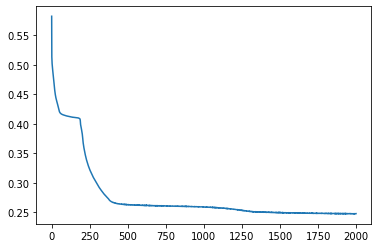

In [14]:
''' Building the NN '''

tf.keras.backend.clear_session()

fraction = 0.35
point = int(len(dataset)*fraction)

xtrain = dataset[:point,:-4]
ytrain = dataset[:point,-4:]

xtest  = dataset[point:,:-4]
ytest  = dataset[point:,-4:]

model2 = createmodel()

#saving the model
modelfolder = '/Users/dan-ioanbultoc/Desktop/EE/training2/'

os.path.dirname(modelfolder)
modelsaver = tf.keras.callbacks.ModelCheckpoint(filepath = modelfolder, save_weights_only = True)

''' Training the NN '''

history = model2.fit(x = xtrain, y=ytrain, epochs=2000, verbose = True, callbacks = [modelsaver])
plt.plot(history.history["loss"])
plt.show()

In [17]:
len(dataset[0,:-4])

7

In [8]:
def process(prediction):#converts from % prediction to [0,0,1,0]
    for i in range(len(prediction)):
        Maxj = 0
        for j in range(len(prediction[i])):
            if prediction[i][j] > prediction[i][Maxj]:
                Maxj = j       
        prediction[i] = [0 if prediction[i][Maxj] > prediction[i][j] else 1 for j in range(len(prediction[i]))]

In [9]:
def analyzemodel(model, xtestdata, ytestdata):
    pred = model.predict(xtestdata)
    process(pred)
    
    diff = abs(pred-ytestdata)
    
    eff = 0
    for predict in diff:
        eff += 1
        for feature in predict:
            if feature != 0:
                eff -= 1
                break
    
    eff /= len(diff)
    return eff*100

In [15]:
print(analyzemodel(model2, xtrain, ytrain))

#print(ytrain[:50,:]) 

72.97921666585036


In [16]:
print(analyzemodel(model2, xtest, ytest))

#print(ytrain[:50,:]) 

72.64851321948969


In [147]:
savedmodel = createmodel()
savedmodel.load_weights(modelfolder)

In [34]:
def drawhist(name, Data, filters, function):
    boundlow = 0
    boundhigh = 0
    
    for d in Data:
        skip = False
        for f in filters:
            if f(d) == False:
                skip = True
        if skip:
            continue
        g = function(d)
        if boundlow > g:
            boundlow = g
        if boundhigh < g:
            boundhigh = g
            
    
    hist = ROOT.TH1F(name, name, int(np.sqrt(len(Data))), boundlow, boundhigh)
    
    for d in Data:
        skip = False
        for f in filters:
            if f(d) == False:
                skip = True
        if skip:
            continue
        g = function(d)
        hist.Fill(g)
        
    print(boundlow)
    print(boundhigh)
    return hist

In [64]:
def eta(p):
    pt = np.sqrt(p[1]**2+p[2]**2)
    pz = p[3]
    return np.log(abs(np.tan((pt-pz)/(2*(pt+pz)))))

In [127]:
def photonpt(d):
    return np.sqrt(d[1]**2 + d[2]**2)

def invariantmass(d):
    return np.sqrt((d[0]+d[4])**2-(d[1]+d[5])**2-(d[2]+d[6])**2-(d[3]+d[7])**2)

def TInvariant(d):
    return np.sqrt(abs((d[0]-d[4])**2-(d[1]-d[5])**2-(d[2]-d[6])**2-(d[3]-d[7])**2))

def drawallhist(name, Lfunction):
    WWhist = drawhist('WWH_'+name, dataset, [lambda d: (True if d[10] == 1 else False)], lambda d: (Lfunction(d)))
    WWhist.Draw()
    ww = 'WWH'+name+'.jpeg'
    canvas.Print(str(ww))

    data1im = drawhist('dataset1'+name, dataset, [lambda d: (True if d[11] == 1 else False)], lambda d: (Lfunction(d)))
    data1im.Draw()
    ww = 'dataset1'+name+'.jpeg'
    canvas.Print(ww)

    data2im = drawhist('dataset2'+name, dataset, [lambda d: (True if d[12] == 1 else False)], lambda d: (Lfunction(d)))
    data2im.Draw()
    ww = 'dataset2'+name+'.jpeg'
    canvas.Print(ww)

    data3im = drawhist('dataset3'+name, dataset, [lambda d: (True if d[13] == 1 else False)], lambda d: (Lfunction(d)))
    data3im.Draw()
    ww = 'dataset3'+name+'.jpeg'
    canvas.Print(ww)

    data4im = drawhist('dataset4_'+name, dataset, [lambda d: (True if d[14] == 1 else False)], lambda d: (Lfunction(d)))
    data4im.Draw()
    ww = 'dataset4'+name+'.jpeg'
    canvas.Print(ww)

    ttHim = drawhist('tt'+name, dataset, [lambda d: (True if d[8] == 1 else False)], lambda d: (Lfunction(d)))
    ttHim.Draw()
    ww = 'ttH'+name+'.jpeg'
    canvas.Print(ww)

    ggHim = drawhist('gg'+name, dataset, [lambda d: (True if d[9] == 1 else False)], lambda d: (Lfunction(d)))
    ggHim.Draw()
    ww = 'ggH'+name+'.jpeg'
    canvas.Print(ww)

In [ ]:
''' old nn with only MC
Building the NN '''

tf.keras.backend.clear_session()

ilayer = layers.Dense(units = 3, input_dim = len(dataset[0,:-3]), activation="relu")
layer1 = layers.Dense(units = 8, activation="relu")
layer2 = layers.Dense(units = 9, activation="relu")
olayer = layers.Dense(units = 3, activation = "sigmoid")

#last layer has 3 nodes - 3 possibilities

model = keras.Sequential([ilayer,layer1,layer2,olayer])

fraction = 0.35
point = int(len(dataset)*fraction)

xtrain = dataset[:point,:-3]
ytrain = dataset[:point,-3:]

xtest  = dataset[point:,:-3]
ytest  = dataset[point:,-3:]

model.compile(
    optimizer = keras.optimizers.SGD(0.001),
    loss="binary_crossentropy"
    )

''' Training the NN '''

history = model.fit(x = xtrain, y=ytrain, epochs=3000, verbose = False)
plt.plot(history.history["loss"])
plt.show()